# Instalacion de librerias
#### En primer lugar, nos aseguramos de tener instaladas las librerías necesarias (pandas, numpy, matplotlib, seaborn, scikit-learn). En caso de necesitar alguna, la podemos instalar ejecutando el siguiente bloque de codigo. Sino es necesario, se puede saltar y pasar al siguiente bloque.

In [4]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

# Carga de librerias y del dataset procesado
#### Importamos las librerias necesarias, cargamos el dataset y mostramos las primeras lineas del dataset para verificar si la carga fue correcta. En caso de haber un problema, aparecerá un mensaje diciendo que se debe verificar la ruta y el nombre del archivo (si descarga el proyecto, sera necesario ajustar la variable "file_path".

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

#  Cargar el dataset 
file_path = 'C:/Users/poopy/Documents/00 - Tecnicatura Ciencia de Datos e Inteligencia Artificial/2025/Aprendizaje_Automatico/Trabajo Final/enfermedades_ecv/data/processed/'
file_name = 'cardiovascular_disease_dataset.csv'
try:
    df = pd.read_csv(file_path+file_name)
    print(f"Dataset '{file_name}' cargado exitosamente.")
    # Mostrar las primeras 5 filas del DataFrame
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encontró. Asegúrate de que el nombre y la ruta sean correctos.")

Dataset 'cardiovascular_disease_dataset.csv' cargado exitosamente.

Primeras 5 filas del DataFrame:
   age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   
2   49       1          2        133              142                  0   
3   43       1          0        138              295                  1   
4   31       1          1        199                0                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           147              0      5.3      3   
1                1           115              0      3.7      1   
2                0           202              1      5.0      1   
3                1           153              0      3.2      2   
4                2           136              0      5.3      3   

   noofmajorvessels  target  
0         

## Análisis Estadístico de los datos

### Distribución de variables numéricas (Histogramas)

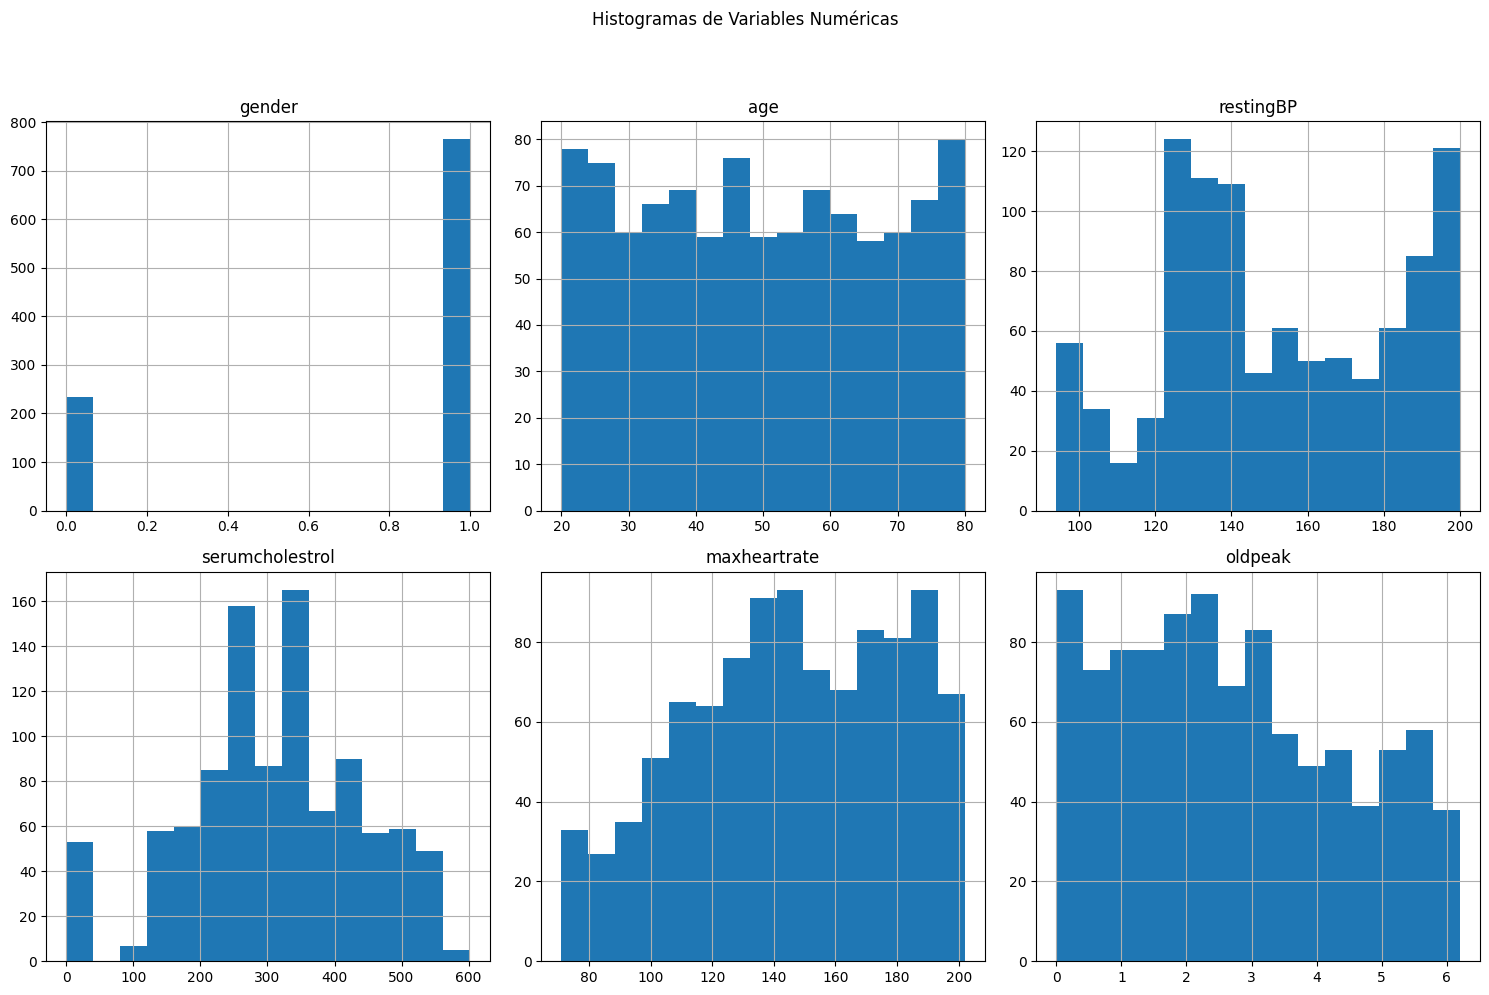

In [9]:
# Seleccionar solo las columnas a graficar
columnas_a_graficar = ['gender','age','restingBP','serumcholestrol','maxheartrate','oldpeak']

df[columnas_a_graficar].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

#### En estos graficos podemos observar la dirtribucion de las variables numericas del dataset y el genero.
* #### Podemos ver que en el dataset predominan los datos de pacientes masculinos sobre los femeninos.
* #### La distrubucion de las edades de los pacientes es bastante pareja, con lo que podriamos decir que el dataset cuenta con una buena cantidad de ejemplos de todo el rango de edades.
* #### Podemos apreciar tambien que el colesterol en sangre tiene una distribucion del tipo normal, lo que indica que la mayoria de los pacientes del estudio presentan una media cercana a los 300mg/dL, mayor a lo aconsejable (idealmente menores a 200mg/dL).
* #### Tambien vemos que la frecuencia cardíaca máxima tiene una tendencia a los valores mas altos en las pruebas de esfuerzo, lo que generalmente es debido a factores como el ejercicio, el estrés, o incluso ciertas condiciones médicas. 
* #### La depresion del segmento ST tiende a los valores mas bajos. Esto es esperado ya que un valor de depresión superior a 2 mm se considera un indicador que requiere mayor investigación. Esto puede indicar varias condiciones, siendo la más común la isquemia miocárdica (flujo sanguíneo insuficiente al corazón), pero también puede ser causada por otros factores. 

### Box Plots para detección de Outliers

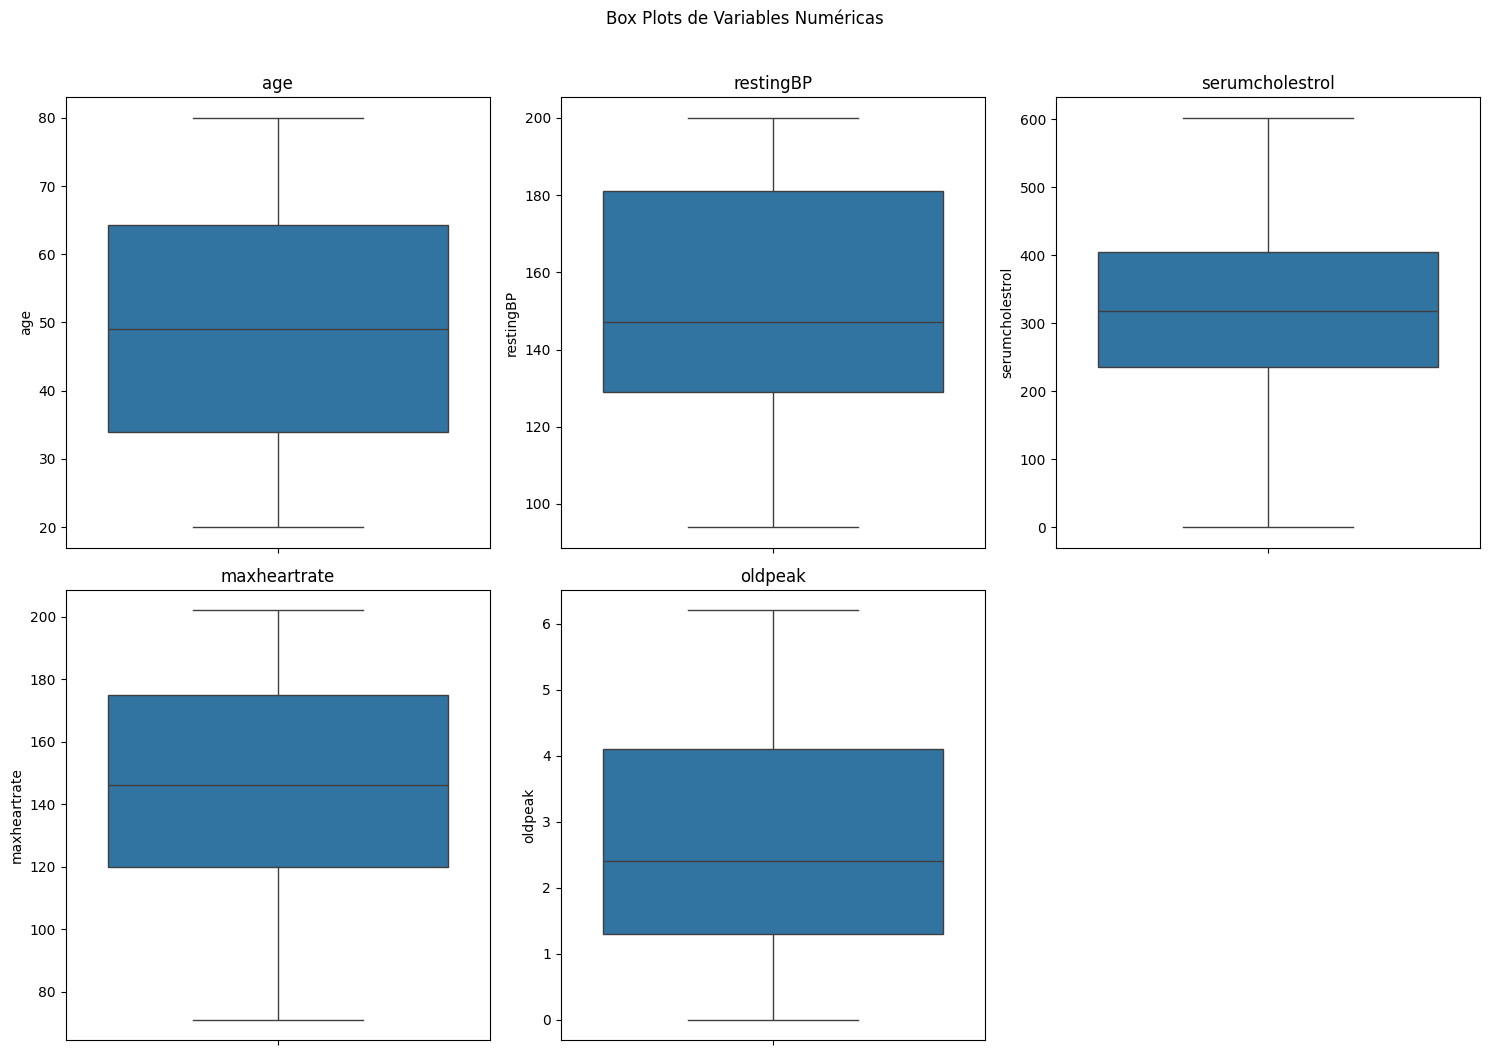

In [12]:
# Seleccionar solo las columnas a graficar
columnas_a_graficar = ['age','restingBP','serumcholestrol','maxheartrate','oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_a_graficar):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.suptitle('Box Plots de Variables Numéricas', y=1.05)
plt.show()

#### Aqui podemos ver que los datos numericos del dataset no presentan valores atipicos (outliers).

### Matriz de Correlación (Heatmap)

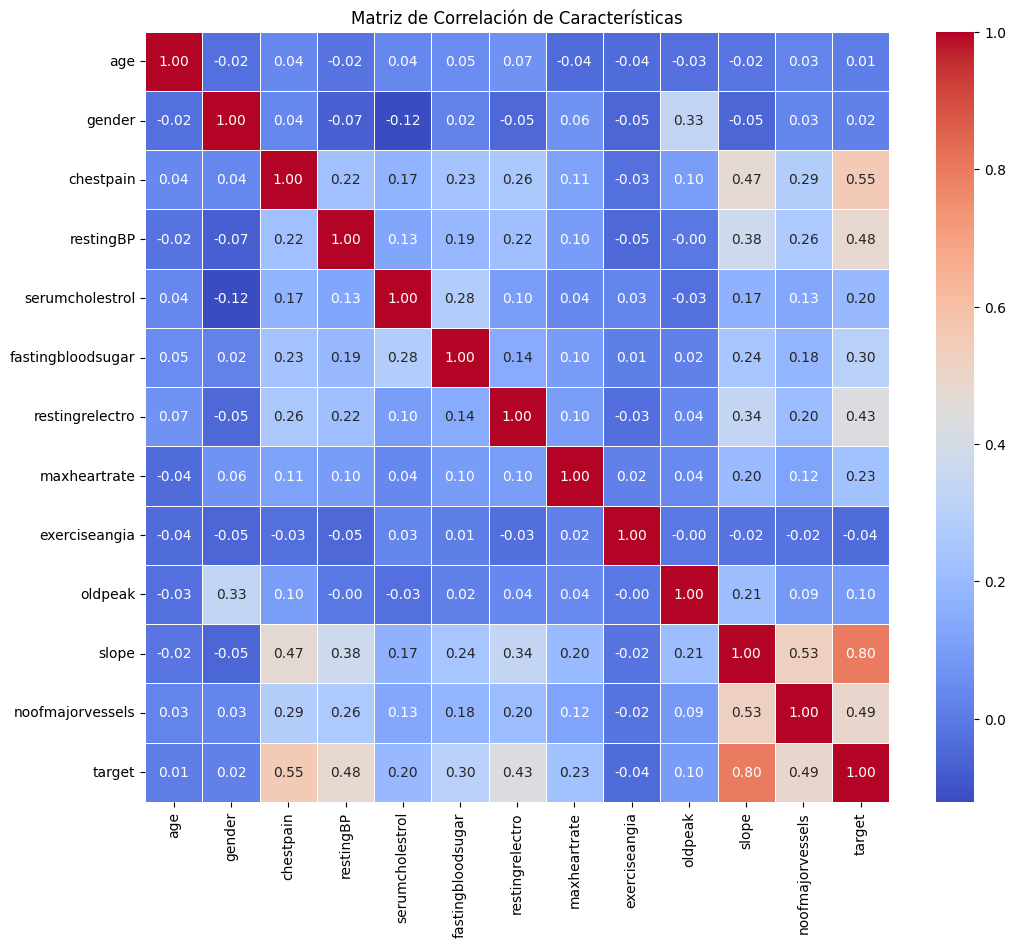


Correlación de las características con la variable 'target':
target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64


In [15]:
plt.figure(figsize=(12, 10))

# Calcular la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características')
plt.show()

# Correlación con la variable objetivo
print("\nCorrelación de las características con la variable 'target':")
print(df.corr()['target'].sort_values(ascending=False))

#### Aqui podemos observar que hay varias caracteristicas que se correlacionan entre si, principalmente target con slope (la pendiente del segmento ST en el ejercicio máximo) y con chespain (dolor en el pecho).

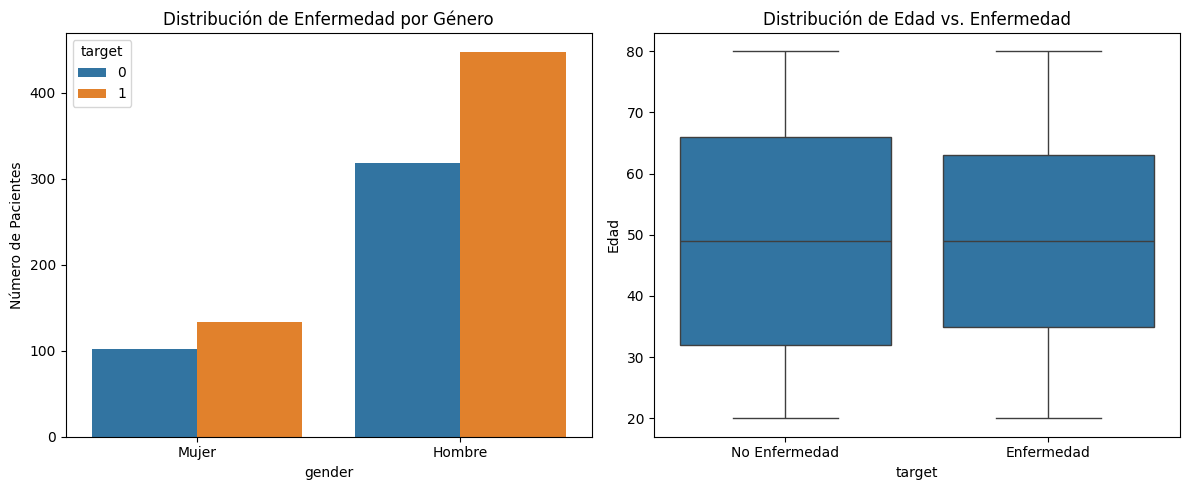

<Axes: xlabel='target', ylabel='restingBP'>

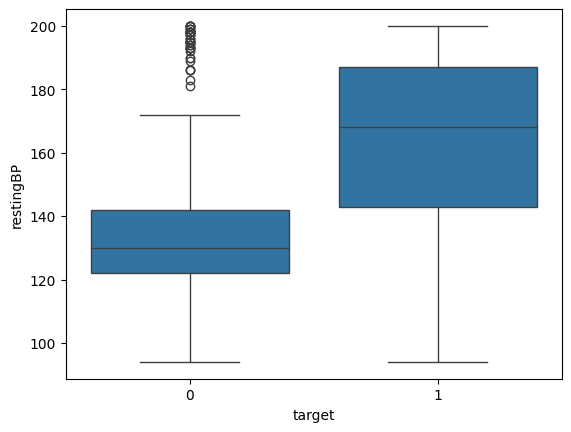

In [17]:
# Visualización de variables categóricas (Count Plots) en relación de algunas columnas importantes con el target

# 'gender' vs 'target'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='target', data=df)
plt.title('Distribución de Enfermedad por Género')
plt.xticks(ticks=[0, 1], labels=['Mujer', 'Hombre'])
plt.ylabel('Número de Pacientes')

# 'age' vs 'target'
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribución de Edad vs. Enfermedad')
plt.xticks(ticks=[0, 1], labels=['No Enfermedad', 'Enfermedad'])
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Puedes añadir más visualizaciones aquí según tu interés:
sns.boxplot(x='target', y='restingBP', data=df)

#### Aqui estamos explorando la relación entre algunas de las características y la variable objetivo (target). Por ejemplo, cómo la distribución de género varía entre pacientes con y sin enfermedad. Tambien vemos como los pacientes con o sin ECV tienen una distribucion normal respecto a la edad, pero respecto a la presion sanguinea (restingBP), si bien hay pacientes sanos con presion alta, los pacientes con ECV en su mayoria tienen valores de presion sanguinea altos. 

## Determinación de Modelos de Clasificación de Aprendizaje Automático
#### En base a las caracteristicas del dataset y queriendo realizar una clasificacion binaria, se decidio utilizar los siguientes modelos:
* #### Regresión Logística
* #### Árboles de Decisión
* #### K-Nearest Neighbors (KNN)
* #### Support Vector Machine (SVM)
* #### Random Forest

## Implementación de Modelos de Clasificación

### División del dataset
#### Consideraremos la división del dataset (80/20) para entrenamiento y pruebas y el escalado de los datos.

In [22]:
#  (80/20) 
# Separar características (X) y la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir el dataset en conjuntos de entrenamiento y prueba
# stratify=y asegura que la proporción de clases en 'y' se mantenga en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (800, 12)
Dimensiones de X_test: (200, 12)
Dimensiones de y_train: (800,)
Dimensiones de y_test: (200,)


### Escalado de los datos

#### Ahora aplicamos StandardScaler a las características numéricas. Es necesario para algoritmos basados en distancia como KNN y SVM, y para la Regresión Logística, pero no es estrictamente necesario para Árboles de Decisión, Random Forest, aunque no les perjudica y es una buena práctica general.

In [25]:
# Identificar columnas numéricas para escalado
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
# Excluir las columnas categoricas binarias si ya son 0/1 y no deben ser escaladas
binary_cols = [col for col in X_train.columns if X_train[col].nunique() == 2 and X_train[col].min() == 0 and X_train[col].max() == 1]
features_to_scale = [col for col in numeric_features if col not in binary_cols]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("\nDatos escalados. Ejemplo de las primeras filas de X_train_scaled:")
print(X_train_scaled.head())


Datos escalados. Ejemplo de las primeras filas de X_train_scaled:
          age  gender  chestpain  restingBP  serumcholestrol  \
289  0.154414       1  -1.021562  -0.126198         1.757440   
821 -0.180208       1  -1.021562  -0.962225        -0.465192   
66   1.660211       1   2.137908   1.612738        -0.343404   
190  1.269819       1   1.084752   0.943916         1.810723   
256  1.660211       1   1.084752   0.709829        -2.352908   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
289                  0         0.327621     -0.301112              1   
821                  1        -0.976343     -1.488201              0   
66                   1         1.631586      0.618881              0   
190                  1        -0.976343     -0.004340              0   
256                  0        -0.976343     -0.657239              0   

      oldpeak     slope  noofmajorvessels  
289 -1.046235  0.456386          0.790183  
821 -1.568590 -1.527901    

### Implementación de los modelos

#### Para optimizar el notebook y no repetir el código, se generó un bucle para el entrenamiento de los modelos.

In [37]:
models = {
    "Regresión Logística": LogisticRegression(random_state=42, solver='liblinear'), # liblinear para datasets pequeños/medianos
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42), # probability=True para ROC AUC
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42, max_depth=None)
}

# Diccionarios para almacenar predicciones y métricas
predictions = {}
probabilities = {} # Para ROC AUC
metrics = {}

for name, model in models.items():
    print(f"Entrenando y evaluando: {name} ")

    # Los modelos basados en distancia/gradiente (RL, KNN, SVM, GB) se benefician del escalado
    # Los modelos basados en árboles (AD, RF) no requieren escalado
    if name in ["Regresión Logística", "K-Nearest Neighbors (KNN)", "Support Vector Machine (SVM)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else: # Para Árbol de Decisión, Random Forest, Gradient Boosting
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]

    predictions[name] = y_pred
    probabilities[name] = y_proba if 'y_proba' in locals() else None

Entrenando y evaluando: Regresión Logística 
Entrenando y evaluando: Árbol de Decisión 
Entrenando y evaluando: K-Nearest Neighbors (KNN) 
Entrenando y evaluando: Support Vector Machine (SVM) 
Entrenando y evaluando: Random Forest 


### Efectividad de cada modelo y comparacion entre ellos
#### A continuacion evaluamos el rendimiento de cada modelo utilizando distintas métricas y las comparamos para determinar cuál es el más efectivo.


 Métricas para Regresión Logística 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        84
           1       0.97      0.99      0.98       116

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Matriz de Confusión:
[[ 81   3]
 [  1 115]]


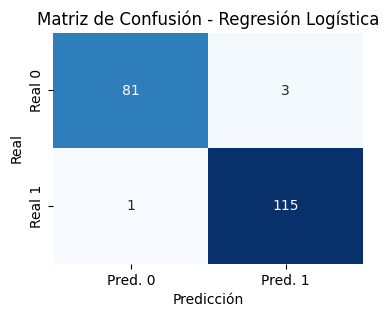


 Métricas para Árbol de Decisión 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.98      0.97      0.98       116

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Matriz de Confusión:
[[ 82   2]
 [  3 113]]


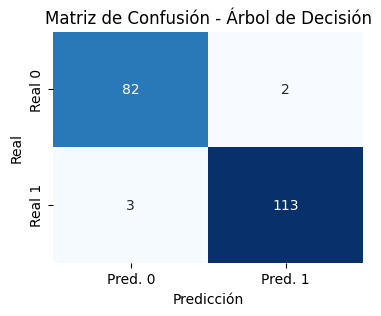


 Métricas para K-Nearest Neighbors (KNN) 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        84
           1       0.95      0.95      0.95       116

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Matriz de Confusión:
[[ 78   6]
 [  6 110]]


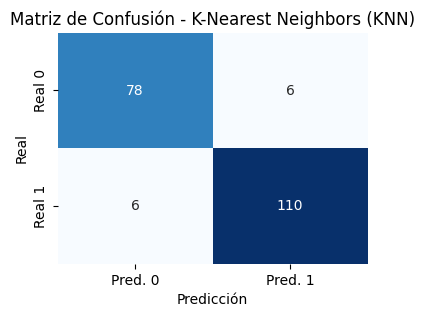


 Métricas para Support Vector Machine (SVM) 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        84
           1       0.97      0.97      0.97       116

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Matriz de Confusión:
[[ 80   4]
 [  3 113]]


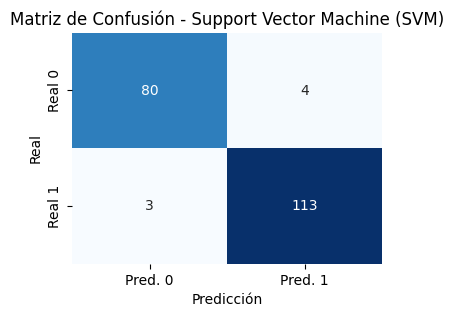


 Métricas para Random Forest 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Matriz de Confusión:
[[ 82   2]
 [  1 115]]


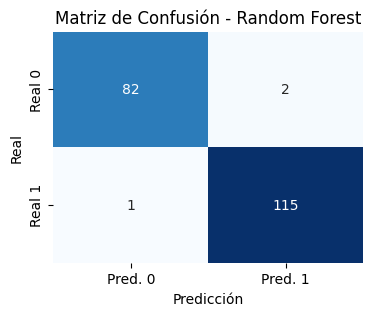

In [40]:
results = []

for name, y_pred in predictions.items():
    y_true = y_test # Las etiquetas verdaderas son las mismas para todos los modelos

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0) # zero_division=0 sirve para evitar warnings si no hay predicciones para una clase
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # ROC AUC
    roc_auc = 0
    if probabilities[name] is not None:
        roc_auc = roc_auc_score(y_true, probabilities[name])
    else:
        print(f"Advertencia: No se pudo calcular ROC AUC para {name} (no hay probabilidades).")

    results.append({
        "Modelo": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC_AUC": roc_auc
    })

    print(f"\n Métricas para {name} ")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("Matriz de Confusión:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['Real 0', 'Real 1'])
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


 Comparación de Métricas de Rendimiento de los Modelos 
                              Accuracy  Precision    Recall  F1-Score  \
Modelo                                                                  
Random Forest                    0.985   0.982906  0.991379  0.987124   
Regresión Logística              0.980   0.974576  0.991379  0.982906   
Árbol de Decisión                0.975   0.982609  0.974138  0.978355   
Support Vector Machine (SVM)     0.965   0.965812  0.974138  0.969957   
K-Nearest Neighbors (KNN)        0.940   0.948276  0.948276  0.948276   

                               ROC_AUC  
Modelo                                  
Random Forest                 0.999282  
Regresión Logística           0.998255  
Árbol de Decisión             0.975164  
Support Vector Machine (SVM)  0.997434  
K-Nearest Neighbors (KNN)     0.986864  


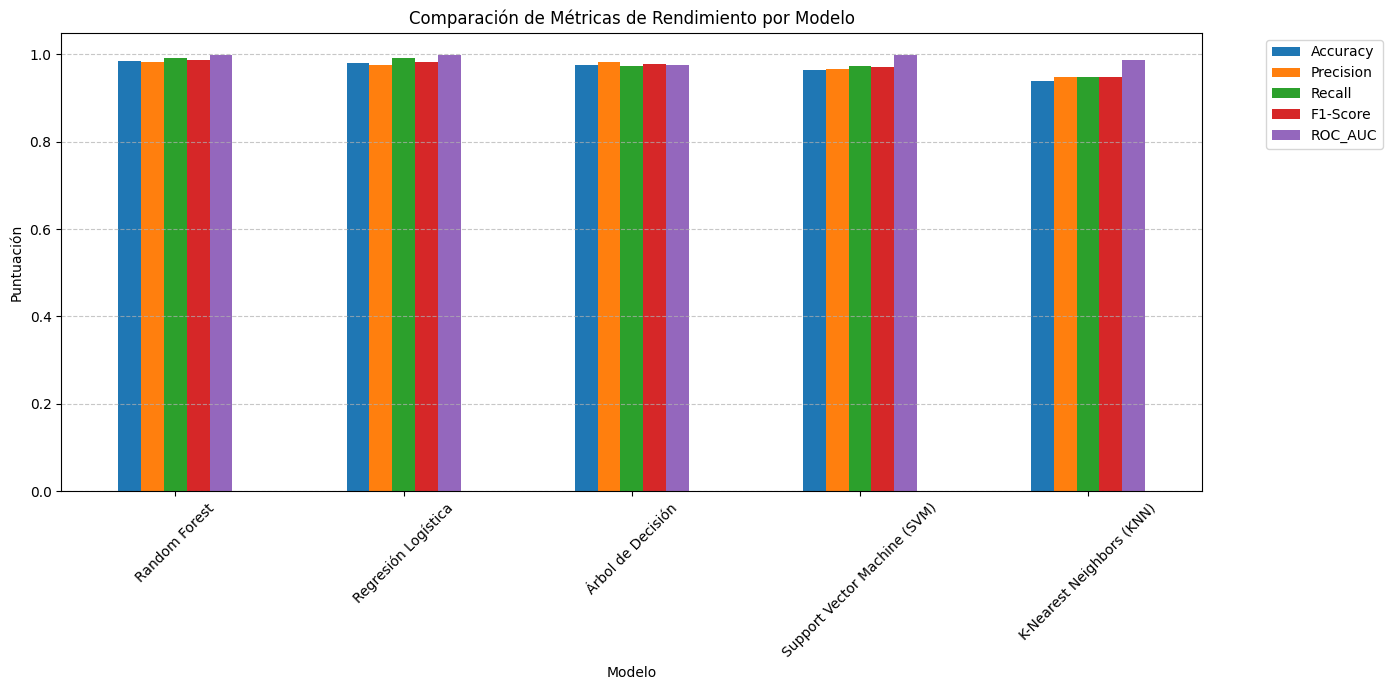

Basándonos en las métricas, el modelo más efectivo es **Random Forest**.
Su F1-Score es de 0.9871 y su ROC AUC es de 0.9993.


In [42]:
# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
results_df.set_index("Modelo", inplace=True)
results_df_sorted = results_df.sort_values(by="F1-Score", ascending=False) # O por ROC_AUC

print("\n Comparación de Métricas de Rendimiento de los Modelos ")
print(results_df_sorted)

# Visualización de la comparación de métricas
results_df_sorted.plot(kind='bar', figsize=(14, 7), rot=45)
plt.title('Comparación de Métricas de Rendimiento por Modelo')
plt.ylabel('Puntuación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

best_model_name = results_df_sorted.index[0]
best_model_f1 = results_df_sorted.iloc[0]['F1-Score']
best_model_roc_auc = results_df_sorted.iloc[0]['ROC_AUC']

print(f"Basándonos en las métricas, el modelo más efectivo es **{best_model_name}**.")
print(f"Su F1-Score es de {best_model_f1:.4f} y su ROC AUC es de {best_model_roc_auc:.4f}.")

#### Basándonos en las métricas, el modelo más efectivo es **Random Forest**.
#### Su F1-Score es de 0.9871 y su ROC AUC es de 0.9993.
#### Ahora que ya sabemos cual es el modelo elegido, vamos a ver cuales son las caracteristicas que mas influyeron en él y en que porcentaje influyo cada una.

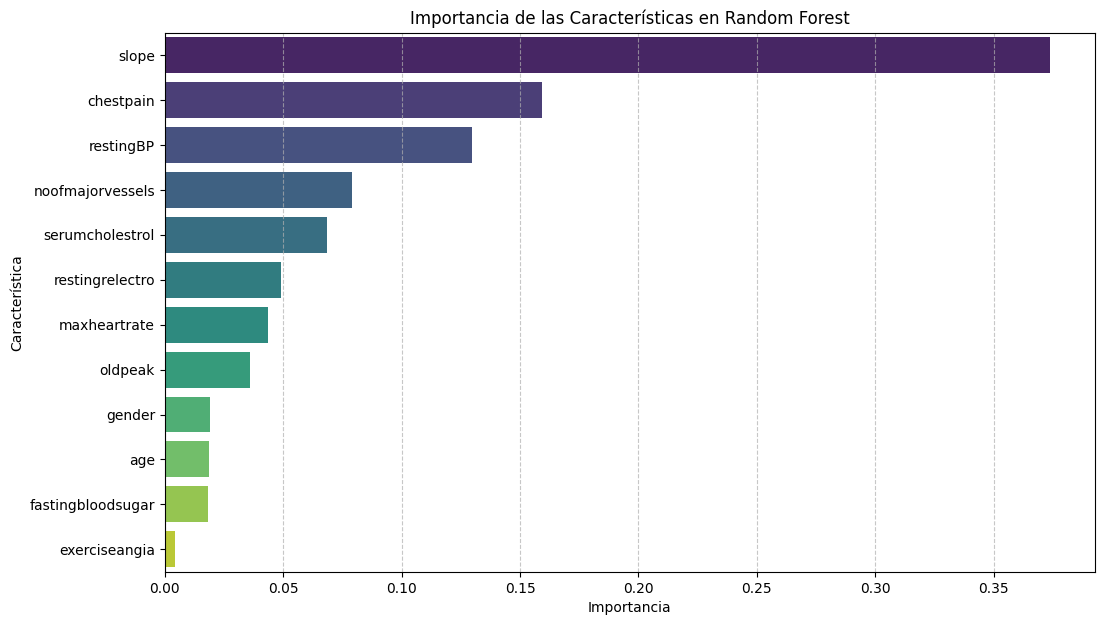


Importancia de las características (ordenadas):
slope                0.373979
chestpain            0.159437
restingBP            0.129842
noofmajorvessels     0.079116
serumcholestrol      0.068396
restingrelectro      0.049270
maxheartrate         0.043535
oldpeak              0.036150
gender               0.019059
age                  0.018745
fastingbloodsugar    0.018277
exerciseangia        0.004193
dtype: float64


In [45]:
# Entrenamos un Random Forest (con menos estimadores para que la visualización sea manejable)
rf_model_viz = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
rf_model_viz.fit(X_train, y_train)


# Obtener la importancia de las características
importances = rf_model_viz.feature_importances_
feature_names = X_train.columns

# Crear una Serie de pandas para ordenar y visualizar
feature_importances_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 7))
#sns.barplot(x=feature_importances_df.values, y=feature_importances_df.index, palette='viridis', legend=False)
sns.barplot(x=feature_importances_df.values, y=feature_importances_df.index, hue=feature_importances_df.index, palette='viridis', legend=False)
plt.title('Importancia de las Características en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\nImportancia de las características (ordenadas):")
print(feature_importances_df)

### Conclusiones y Justificación del modelo más efectivo 

#### Basándonos en las métricas, el modelo más efectivo es **Random Forest**. Su F1-Score es de 0.9871 y su ROC AUC es de 0.9994.

#### La elección del "mejor" modelo es un proceso de optimización multiobjetivo. No es solo la precisión, sino el equilibrio entre rendimiento, interpretabilidad, velocidad, y recursos, alineado con los requisitos y limitaciones del problema de negocio o clínico.

#### Si bien Random Forest es marginalmente mejor en métricas clave, quizas otro modelo (como Regresión Logística o un Árbol de Decisión simple) podria ofrecer ventajas significativas en velocidad, interpretabilidad o recursos computacionales, que podrian ser críticas para su implementacion, y entonces sí, podría ser mejor elegir otro modelo. Tambien es importante considerar la **complejidad** del modelo. Un modelo de árbol de decisión podría ser preferible si la interpretabilidad es una prioridad clave, incluso si su rendimiento es ligeramente inferior a un Random Forest. 
#### Para elegir el mejor modelo, usamos F1-score y ROC-AUC. El F1-score mide el equilibrio entre precisión y exhaustividad, mientras que ROC-AUC evalúa la capacidad de discriminación del modelo en todos los umbrales. Ambos brindan una visión completa. Para problemas de salud, un buen F1-Score y un alto ROC AUC suelen ser deseables, ya que tanto diagnosticar a un sano como enfermo (falso positivo) como no diagnosticar a un enfermo (falso negativo) pueden tener consecuencias.Por ello es que en este caso, se ha utilizado el **F1-Score** (y ROC AUC como métrica complementaria) para determinar el mejor modelo. 

#### El modelo **Random Forest** mostró el mejor balance entre estas métricas, indicando una capacidad superior para clasificar correctamente ambos tipos de pacientes (con y sin enfermedad cardiovascular) en comparación con los otros modelos evaluados.